In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [10]:
train_data = pd.read_csv('NIFTY_VIX_train.csv', index_col=0)
test_data = pd.read_csv('NIFTY_VIX_test.csv', index_col=0)
X_train = train_data.drop(columns=['close_NIFTY'])
y_train = train_data['close_NIFTY']
X_test = test_data.drop(columns=['close_NIFTY'])
y_test = test_data['close_NIFTY']
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [11]:
model = Sequential()
model.add(GRU(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.01), 
               input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
#model.add(GRU(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.01), return_sequences=True))
model.add(GRU(128, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.01), return_sequences=True))
model.add(GRU(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.01), return_sequences=False))
model.add(Dense(1, kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))

/Users/harsh/.local/pipx/venvs/jupyter/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer=Adam(learning_rate=0.003), loss='mean_squared_error')
#model.compile(optimizer=Adam(learning_rate=0.002), loss='huber')
history = model.fit(X_train_scaled, y_train, epochs=120, batch_size=32, validation_split=0.2, verbose=1)
y_pred = model.predict(X_test_scaled)

Epoch 1/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 159374960.0000 - val_loss: 301254016.0000
Epoch 2/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 157687584.0000 - val_loss: 298076832.0000
Epoch 3/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 154052064.0000 - val_loss: 294939904.0000
Epoch 4/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 152515872.0000 - val_loss: 291834880.0000
Epoch 5/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 150491744.0000 - val_loss: 288756256.0000
Epoch 6/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 148115856.0000 - val_loss: 285698240.0000
Epoch 7/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 146575584.0000 - val_loss: 282661984.0000
Epoch 8/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 144736176.0000 - val_loss: 279643136.0000
Epoch 9/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 142450384.0000 - val_loss: 276644736.0000
Epoch 10/120
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step -

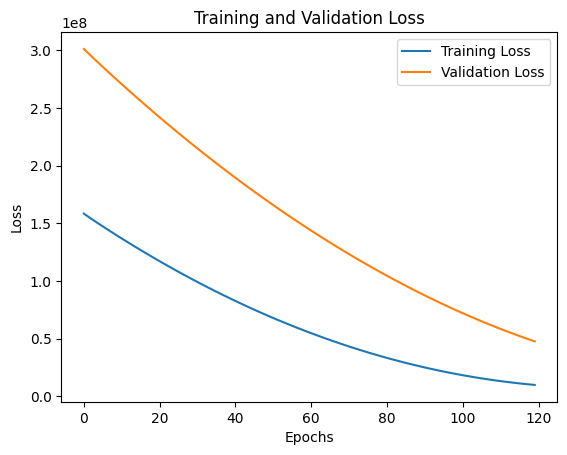

In [13]:
# Step 8: Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()